# Árvore de Decisão
---

<img src="https://selecao-stg.letscode.com.br/favicon.png" style="position: absolute; top: 0.75rem; right: 2rem; width: 50px" />

### Roteiro da Aula

1. O que são Árvores de Decisão?
2. Como as decisões da árvore são elaboradas?
3. Gini e Entropia
4. Aplicando o algoritmo da árvore de decisão
    - Visualizando a árvore
    - Obtendo métricas
5. Principais parâmetros da árvore

## Introdução

Da mesma forma que uma uma regressão logística, uma árvore de decisão representa uma função que toma como entrada uma série de atributos/*features* e retorna uma **decisão**: um valor de saída único.

Uma boa analogia é com os manuais de conserto de eletrodomésticos dos anos 90: se uma situação A acontecer, você seguirá os passos descritos pelo caminho A+; caso contrário, seguirá pelo caminho A-; cada caminho levará a diferentes verificações e, consequentemente, a diferentes conclusões.  chegando à sua conclusão por meio da execução de uma série de testes, em geral de "verdadeiro-falso". De forma simples e direta, é um conjunto de regras *if-then-else*, sendo de fácil interpretação e implementação.

Olhando para o exemplo da imagem a seguir, podemos ilustrar essa sequência: a raiz e cada nó interno na árvore correspondem ao testes de um atributo de entrada do modelo; as folhas representam a decisão para esse caminho que foi percorrido. 

![tree_nos](https://s3-sa-east-1.amazonaws.com/lcpi/e0995123-6add-49a7-b541-af7b4a5f6cd5.jpg)

**Exemplo:**


<img src="https://didatica.tech/wp-content/uploads/2020/07/image-3.png" width=500>

Porém, os testes que ocorrem nos atributos não são aleatórios: devem ser entendidos como funções de custo que buscam otimizar a homogeneidade de suas subpopulações. Queremos fazer com que cada subpopulação de cada nó esteja cada vez mais homogêneo possível, até chegar a folha, usando para isso uma estratégia de dividir para conquistar.

### Entendendo o algoritmo de Árvore de Decisão por meio do dataset da Iris

<img src="https://miro.medium.com/max/384/0*VyeowlJuw5gXYRer." />
<img src="https://miro.medium.com/max/700/1*HMcpfu9zlpTurI2h2mugCQ.png" />
<img src="https://miro.medium.com/max/700/1*0iIETN4VtYOFke9MK1zi-g.png" />
<img src="https://miro.medium.com/max/700/1*fXpkqRhmvuJq7SvK7XTknw.png" />


Vamos tomar como base uma amostra da tabela do Titanic:

In [1]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando o dataset 
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/5729687e-ae14-4978-8cd7-7ef18277813d.csv')

In [3]:
# Obtendo uma amostra do dataset (random_state=50)
df_sample = df.sample(n=100, random_state=50)

**Para pensar:** intuitivamente, entre Sex e Parch, qual é a coluna que mais discrimina sobrevivência? Por quê?

In [4]:
df_sample.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,NaN,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [5]:
df_sample['Survived'].value_counts(True)

0    0.52
1    0.48
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

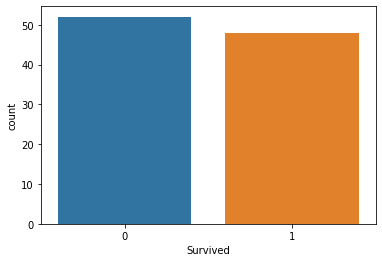

In [6]:
sns.countplot(data=df_sample, x='Survived')

In [7]:
df_sample[df_sample['Parch'] == 0]['Survived'].value_counts(True)

0    0.614286
1    0.385714
Name: Survived, dtype: float64

In [8]:
df_sample[df_sample['Parch'] == 2]['Survived'].value_counts(True)

1    0.666667
0    0.333333
Name: Survived, dtype: float64

In [9]:
df_sample[df_sample['Sex'] == 'male']['Survived'].value_counts(True)

0    0.786885
1    0.213115
Name: Survived, dtype: float64

In [10]:
df_sample[df_sample['Sex'] == 'female']['Survived'].value_counts(True)

1    0.897436
0    0.102564
Name: Survived, dtype: float64

### Como a Árvore de Decisão escolhe as features que produzem a melhor separação?

__Exemplo__

Digamos que uma amostra de 30 alunos tem duas variáveis: Sexo (masculino ou feminino), Turma (IX ou X). 

Digamos também que 15 destes 30 jogam tênis no recreio. 

A árvore de decisão segregará os alunos com base nos valores das variáveis e **identificará a variável que cria os melhores conjuntos homogêneos de alunos** quanto ao target: quem joga tênis, e quem não joga.

Toda árvore começa pelo nó raiz, então, uma pergunta natural é: **qual feature utilizamos para fazer a quebra do nó raiz: sexo ou turma?**

Há duas quebras possíveis:

<img src="https://i2.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo-Tutorial_completo_arvore_decisao_03.jpg?resize=617%2C293&ssl=1" width=500>

Vemos que, **dependendo da feature que utilizamos pra fazer a quebra**, conseguimos **graus de separações diferentes dos dados com relação ao target**:


<table>
<thead>
  <tr>
    <th colspan="4"><center>Sexo</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>Meninas</center></td>
    <td colspan="2"><center>Meninos</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>2</center></td>
    <td><center>8</center></td>
    <td><center>13</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>10</center></td>
    <td colspan="2"><center>20</center></td>
  </tr>
</tbody>
</table>


<table>
<thead>
  <tr>
    <th colspan="4"><center>turma</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>IX</center></td>
    <td colspan="2"><center>X</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>6</center></td>
    <td><center>8</center></td>
    <td><center>9</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>14</center></td>
    <td colspan="2"><center>16</center></td>
  </tr>
</tbody>
</table>

Como decidir qual das quebrar acima **separou melhor os dados com relação ao target?**

Matematicamente, o modelo pode usar dois critérios diferentes para decidir como fazer as quebras na árvore: o **critério de Gini** ou o **critério da entropia**.

______

### Critério do Gini

A **impureza de Gini** mede o quão "impuras" são as folhas das árvores construídas após as quebras nos nós. O coeficiente é dado por:

$$Gini(D) = 1 - \sum{p_{i}^2}$$

Onde $p_i$ são as **proporções** de separação do target em cada quebra.

Aqui estaremos interessados **em como a impureza muda após as quebras**. Nosso objetivo será **maximizar a purificação proporcionada pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona a maior purificação**.

- **Impureza antes da divisão**: Como não havia separação alguma, a impureza era dada simplesmente pelo balanço natural dos dados: 

$$G(\text{pré-divisão}) = 1 - ((15/30)^2 + (15/30)^2) = 0.5$$

Temos duas quebras possíveis:

#### 1. Divisão por **sexo**:

Após a divisão dos dados pela feature **sexo**, passamos a ter as seguintes impurezas, segundo a tabela acima: 

- $G(\text{meninas}) = 1 - (\frac{2}{10}^2 + \frac{8}{10}^2) = 0.319$

- $G(\text{meninos}) = 1 - ( \frac{13}{20}^2 + \frac{7}{20}^2) = 0.454$

Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 

<br>

$G(\text{pós-divisão}) = \frac{10}{30} \times G(\text{meninas}) + \frac{20}{30} \times G(\text{meninos})
= 0.33 \times 0.319 + 0.66 \times 0.454
= 0.40491$

Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **sexo** é de:

<br>

$$\Delta G_{\text{sexo}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.40491 = 0.095$$
    
    
<br> 

#### 2. Divisão por **turma**:

Após a divisão dos dados pela feature **classe**, passamos a ter as seguintes impurezas, segundo a tabela acima:

- $G(\text{IX}) = 1 - (\frac{6}{14}^2 + \frac{8}{14}^2) = 0.489$

- $G(\text{X}) = 1 - ( \frac{9}{16}^2 + \frac{7}{16}^2) = 0.492$

Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 

<br>

$G(\text{pós-divisão}) = \frac{14}{30} \times G(\text{IX}) + \frac{16}{30} \times G(\text{X})
= 0.46 \times 0.489 + 0.53 \times 0.492
= 0.4857$

Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **classe** é de:

<br>

$$\Delta G_{\text{classe}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.4857 = 0.014$$
 

 
Agora, como escolher a melhor quebra?

> O **critério de Gini** consiste em **escolher a quebra que proporciona a maior perda de impureza**, ou, equivalentemente, **a maior purificação**.

Assim, a divisão a ser escolhida seria por **sexo**. 

Depois, aplica-se o mesmo procedimento para os nós resultantes.

_________

### Critério de entropia

A **entropia** é uma quantidade definida em física e teoria da informação com o objetivo de quantificar **o grau de desordem de um sistema**, ou, equivalentemente, **o quanto de informação se tem sobre determinado sistema**.

A entropia é dada por:

 $$E = -\sum{p_{i} \log_{2}{p_{i}}}$$
 
Onde $p_i$ são as **proporções** de separação do target em cada quebra.

Aqui estaremos interessados **em como a impureza muda após as quebras**. 
 
Aqui também estaremos interessados **em como a entropia muda após as quebras**. Nosso objetivo será **maximizar o ganho de informação proporcionado pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona o maior ganho de informação**.

- **Entropia antes da divisão**: 

$$E(pré-divisão) = \frac{15}{10}log_{2}{\frac{15}{10}} + \frac{15}{10}log_{2}{\frac{15}{10}} = 1$$


Temos duas quebras possíveis:

#### 1. Divisão por sexo: 

- $E(\text{meninas}) = -1 \times (\frac{2}{10} \log_{2}\frac{2}{10} + \frac{8}{10} \log_{2}\frac{8}{10}) = 0.721$
- $E(\text{meninos}) = -1 \times (\frac{13}{20} \log_{2}\frac{13}{20} + \frac{7}{20} \log_{2}\frac{7}{20}) = 0.934$

A entropia ponderada após a divisão por **sexo** é:

<br>

$E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{meninas}) + \frac{20}{30} \times E(\text{meninos}) =  0.863$

Assim, o ganho de informação após a divisão por **sexo** é:

<br>

$$\Delta E_{\text{sexo}} = E(\text{pré-divisão}) - E(\text{pós-divisão}) = 1 - 0.863 = 0.137$$

<br>

#### 2. Divisão por classe:

- $E(\text{IX}) = -1 \times (\frac{6}{14} \log_{2}\frac{6}{14} + \frac{8}{14} \log_{2}\frac{8}{14}) = 0.985$
- $E(\text{X}) = -1 \times (\frac{9}{16} \log_{2}\frac{9}{16} + \frac{7}{16} \log_{2}\frac{7}{16}) = 0.988$

A entropia ponderada após a divisão por **classe** é:

<br>

$E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{IX}) + \frac{20}{30} \times E(\text{X}) =  0.986$

Assim, o ganho de informação após a divisão por **classe** é:

<br>

$$\Delta E_{\text{classe}} = E(\text{pré-divisão}) - E(\text{pós-divisão}) = 1 - 0.986 = 0.014$$

Também pela entropia, a divisão a ser escolhida seria por **sexo**. 

Depois, aplica-se o mesmo procedimento para os nós resultantes, até obter-se nós puros.

---

### Critério da Entropia

Em árvores de decisão, estamos buscando separar as instâncias de forma a obter o máximo de homogeneidade possível nas folhas, observando a variável resposta. Para chegar nesse ponto, olhamos para o conjunto de dados, escolhemos uma variável e um limiar e dividimos em dois subconjuntos baseados nisso. A partir daí podemos repetir o passo anterior para cada subconjunto, e para cada subconjunto gerado nos subconjuntos, fazendo um processo recursivo até que tenhamos nosso conjunto de dados perfeitamente separado.

Porém, precisamos escolher um critério para escolher uma variável e limiar para separar em dois subconjuntos. Para isso, usaremos um conceito da Teoria da Informação chamado Entropia, que mede a aleatoriedade de uma variável aleatória, sendo dada por:

$$H(\textrm{VA}) = -\sum_i{p_i \times \log_{2}{p_i}}$$


Exemplificando com uma moeda $M_1$ não viciada, podemos citar dois eventos: 

- 1, cara, com probabilidade $p_1 = 0.5$
- 2, coroa, com probabilidade $p_2 = 0.5$

Dessa forma, a entropia $H(M_1)$ é:

$$H(M_1) = -(0.5 \times \log_{2}{0.5} + 0.5 \times \log_{2}{0.5}) = 1$$

Logo, a entropia é máxima (casos binário), significando que essa variável possui um alto nível de aleatoriedade.

In [11]:
-(0.5 * np.log2(0.5) + 0.5*np.log2(0.5))

1.0

Exemplificando com uma moeda $M_2$ viciada, podemos citar dois eventos: 

- 1, cara, com probabilidade $p_1 = 0.1$
- 2, coroa, com probabilidade $p_2 = 0.9$


In [12]:
-(0.1*np.log2(0.1) + 0.9*np.log2(0.9))

0.4689955935892812

Podemos verificar esse pico ao pensar em moedas viciadas com probabilidades do evento 1 linearmente espaçadas entre 0 e 1:

[]

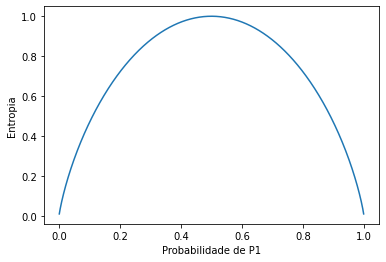

In [13]:
p1 = np.arange(0.001, 1, 0.001)
p2 = 1 - p1

entropia = -(p1*np.log2(p1) + p2*np.log2(p2))

plt.plot(p1, entropia)
plt.xlabel('Probabilidade de P1')
plt.ylabel('Entropia')

plt.plot()

$$H(\textrm{VA}) = -\sum_i{p_i \times \log_{2}{p_i}}$$


Exemplificando com uma moeda $M_1$ não viciada, podemos citar dois eventos: 

- 1, cara, com probabilidade $p_1 = 0.5$
- 2, coroa, com probabilidade $p_2 = 0.5$

Dessa forma, a entropia $H(M_1)$ é:

$$H(M_1) = -(0.5 \times \log_{2}{0.5} + 0.5 \times \log_{2}{0.5}) = 1$$

#### **Para pensar:** Qual que é a entropia da variável Survived?

Primeiro, quais são as probabilidades de 0 e 1 na variável `Survived`?

In [14]:
calc_entropy = lambda p1, p2: -(p1 * np.log2(p1) + p2 * np.log2(p2))

#### **Para pensar:** E se nós dividirmos pelo `Sex`, como ficariam as entropias?

## Ganho de Informação
    
Em casos binários, no qual uma variável aleatória assume o valor 0 ou 1, podemos escrever a entropia como

$$H(\textrm{VA}) = B\left( \frac{p}{p + n}\right)= -\big[p \times \log_{2}{p} + (1 - p) \times \log_{2}(1 - p)\big]$$

O que queremos obter com a divisão do conjunto de dados são subconjuntos que diminuam ao máximo a aleatoriedade da variável resposta do conjunto original. Logo, para cada atributo do conjunto de dados, queremos calcular o **Ganho de Informação** que mede a redução na entropia das partições obtidas de acordo os valores desse atributo. Isso é dado pela diferença entre a entropia do conjunto de exemplos original e a soma ponderada da entropia das partições, sendo a construção da árvore orientada pelo objetivo de reduzir a entropia.

Ou seja, um atributo $A$ com $d$ valores possíveis para ele gera $S$ subconjuntos $S_1, S_2, ..., S_d$. Cada subconjunto $S_k$ possui $p_k$ exemplos positivos e $n_k$ exemplos negativos, nos dando uma entropia de $B\left( \frac{p_k}{p_k + n_k}\right)$. Ponderando pela quantidade de exemplos dos subconjuntos, temos um conteúdo de informação esperado do atributo $A_i$ de

$$
  E(A_i) = \sum_i{\frac{p_k + n_k}{p + k} B\left( \frac{p_k}{p_k + n_k} \right)}
$$

Dessa forma, o Ganho de Informação do atributo $A_i$ é a redução na entropia do estado anterior para o estado posterior, na forma:

$$
  \textrm{Ganho}(A_i) =  B\left( \frac{p}{p + n} \right) - E(A_i)
$$


### Em outras palavras

O ganho de informação é calculado a partir dessa lógica. Se quando eu analiso um atributo, os registros das bases para cada lado são homogêneos ou próximos disso, temos um alto ganho de informação. Afinal, sabemos que se optarmos por determinada condição, é muito provável que saibamos exatamente a saída esperada ou estejamos mais próximos de descobrir. 

![](https://blog.somostera.com/hs-fs/hubfs/Blog_free_images/ganho-de-informacao-arvore-de-decisao.png?width=600&name=ganho-de-informacao-arvore-de-decisao.png)



---

### Em resumo...

#### O que é uma Árvore de Decisão?

- Um algoritmo que, a partir da definição de algumas regras, direciona a resposta de uma nova instância para alguma folha específica que trará a previsão.
- As regras são criadas de forma a ter nós e folhas cada vez "mais puros" (mais homogêneos, ou com "menos incerteza") em relação a variável resposta.

#### O que é Gini?

- Refere-se ao grau de impureza de uma amostra.
- Quanto mais misturados os dados, maior a impureza e, portanto, maior o valor do Gini.
- O Gini varia entre 0 e 0,5.


#### O que é Entropia?

- Grau de desordem de uma amostra.
- Nível de aleatoriedade.
- Quanto maior a entropia, mais aleatório.
- A entropia varia entre 0 (entropia mínima) e 1 (entropia máxima).

#### O que é ganho de informação?

- É a diminuição da entropia do cenário pré-quebra para o cenário pós-quebra.  
- Quanto maior o ganho de informação, mais predizível se tornará a variável.  
- Por outro lado, se o ganho de informação for baixo, o grau de incerteza ao se tentar prever o valor da variável não vai cair significativamente.

---

### Aplicando o algoritmo de Árvore de Decisão no dataset do Titanic (`Pclass` e `Sex`)

In [15]:
df['Sex'] = df['Sex'].map({
    'male': 0,
    'female': 1
})

In [16]:
X = df[['Pclass', 'Sex']]

In [17]:
y = df['Survived']

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
tree = DecisionTreeClassifier(criterion='entropy')

In [20]:
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [21]:
y_proba = tree.predict_proba(X)[:,1]
y_pred = tree.predict(X)

In [22]:
y[:5].values # Valores reais

array([0, 1, 1, 1, 0])

In [23]:
y_pred[:5] # Valores preditos

array([0, 1, 0, 1, 0])

In [24]:
y_proba[:5]

array([0.13544669, 0.96808511, 0.5       , 0.96808511, 0.13544669])

#### Calculando as métricas do modelo

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [26]:
accuracy_score(y, y_pred)

0.7867564534231201

In [27]:
precision_score(y, y_pred)

0.9470588235294117

In [28]:
recall_score(y, y_pred)

0.47076023391812866

In [29]:
roc_auc_score(y, y_proba)

0.8328353518891338

### Visualizar a árvore de decisão

In [30]:
from sklearn.tree import plot_tree

[]

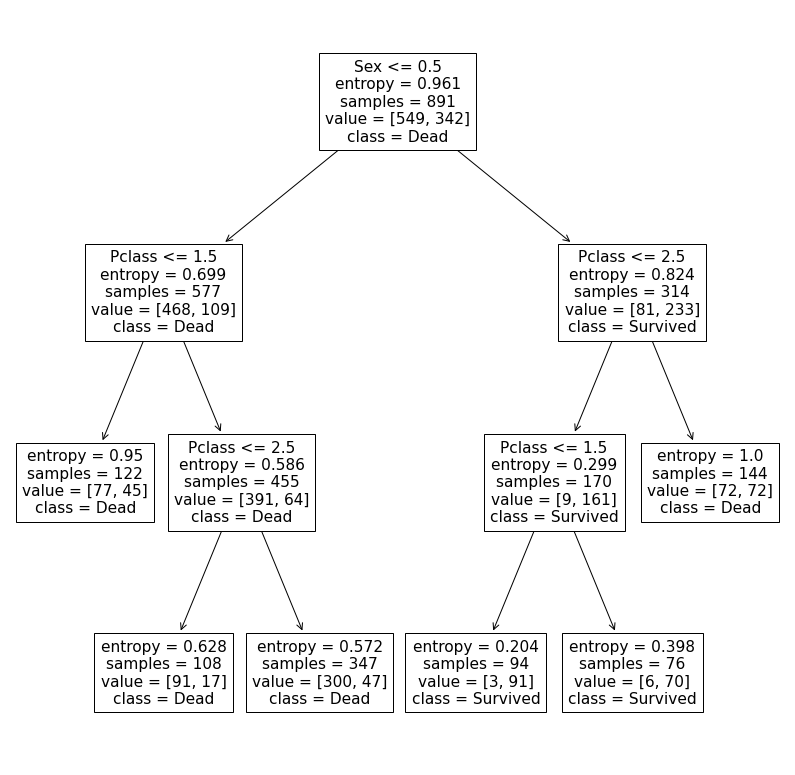

In [31]:
plt.figure(figsize=(14, 14))
plot_tree(tree, feature_names=X.columns, class_names=['Dead', 'Survived'])
plt.plot()

### Modelo com `Fare` e `Sex`

In [32]:
X1 = df[['Fare', 'Sex']]

In [33]:
y1 = df['Survived']

In [47]:
tree1 = DecisionTreeClassifier(criterion='entropy')

In [48]:
tree1.fit(X1, y1)

DecisionTreeClassifier(criterion='entropy')

In [49]:
y_proba1 = tree1.predict_proba(X1)[:,1]
y_pred1 = tree1.predict(X1)

In [50]:
y1[:5].values # Valores reais

array([0, 1, 1, 1, 0])

In [51]:
y_pred1[:5] # Valores preditos

array([0, 1, 1, 1, 0])

In [52]:
y_proba1[:5]

array([0.        , 1.        , 0.6       , 1.        , 0.12195122])

#### Calculando as métricas do modelo

In [53]:
accuracy_score(y1, y_pred1)

0.9023569023569024

In [54]:
precision_score(y1, y_pred1)

0.9322033898305084

In [55]:
recall_score(y1, y_pred1)

0.804093567251462

In [56]:
roc_auc_score(y1, y_proba1)

0.9655141192385943

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y1, y_pred1)

array([[529,  20],
       [ 67, 275]])

In [59]:
# plot_tree(tree1) # A árvore fica enorme!

#### Analisando a região de decisão do modelo

> [Como plotar a região de decisão de um algoritmo de ML?](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/)

In [60]:
from mlxtend.plotting import plot_decision_regions

/home/walisson/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

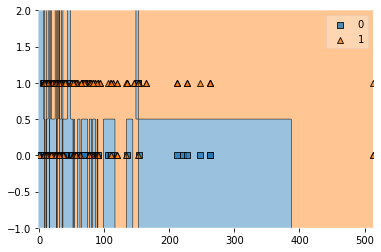

In [62]:
plot_decision_regions(X1.values, y1.values, clf=tree1)

#### Considerando a variável idade (`Fare`, `Sex`, `Age`)

In [63]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [65]:
X2 = df[['Age', 'Fare', 'Sex']]
y2 = df['Survived']

In [69]:
tree2 = DecisionTreeClassifier().fit(X2, y2)

y_pred2 = tree2.predict(X2)
y_proba2 = tree2.predict_proba(X2)[:,1]

#### Calculando Métricas

- Acurácia
- Matriz de Confusão
- ROC AUC

In [67]:
accuracy_score(y2, y_pred2)

0.9775533108866442

In [68]:
confusion_matrix(y2, y_pred2)

array([[546,   3],
       [ 17, 325]])

In [70]:
roc_auc_score(y2, y_proba2)

0.9988069749358217

#### Divisão Treino/Teste (e visualizando um problema)

In [73]:
from sklearn.model_selection import train_test_split

In [78]:
def calc_model_metrics(X, y, model=DecisionTreeClassifier()):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

  tree = model.fit(X_train, y_train)

  y_pred_train = tree.predict(X_train)
  y_proba_train = tree.predict_proba(X_train)[:,1]

  y_pred_test = tree.predict(X_test)
  y_proba_test = tree.predict_proba(X_test)[:,1]

  print('🏋️‍♀️ TRAIN 🏋️‍♀️')
  print('Acurácia:', accuracy_score(y_train, y_pred_train))
  print('Matriz de confusão:', confusion_matrix(y_train, y_pred_train))
  print('ROC AUC:', roc_auc_score(y_train, y_proba_train))
  
  print('\n\n🔥 TEST 🔥')
  print('Acurácia:', accuracy_score(y_test, y_pred_test))
  print('Matriz de confusão:', confusion_matrix(y_test, y_pred_test))
  print('ROC AUC:', roc_auc_score(y_test, y_proba_test))

In [79]:
calc_model_metrics(X2, y2)

🏋️‍♀️ TRAIN 🏋️‍♀️
Acurácia: 0.9775280898876404
Matriz de confusão: [[392   3]
 [ 11 217]]
ROC AUC: 0.9988785254274928


🔥 TEST 🔥
Acurácia: 0.7574626865671642
Matriz de confusão: [[133  21]
 [ 44  70]]
ROC AUC: 0.7391205285942127


### Parâmetros importantes

- `max_depth`: profundidade máxima da árvore.
- `min_samples_split`: Número mínimo de amostras para separá-las, gerando um novo nó.
- `min_samples_leaf`: Número mínimo de amostras na folha.

In [80]:
calc_model_metrics(X2, y2, DecisionTreeClassifier(max_depth=4))

🏋️‍♀️ TRAIN 🏋️‍♀️
Acurácia: 0.8234349919743178
Matriz de confusão: [[335  60]
 [ 50 178]]
ROC AUC: 0.8693204530313124


🔥 TEST 🔥
Acurácia: 0.7611940298507462
Matriz de confusão: [[127  27]
 [ 37  77]]
ROC AUC: 0.7854294827979038


In [81]:
calc_model_metrics(X2, y2, DecisionTreeClassifier(max_depth=3))

🏋️‍♀️ TRAIN 🏋️‍♀️
Acurácia: 0.8138041733547352
Matriz de confusão: [[349  46]
 [ 70 158]]
ROC AUC: 0.8429435931601155


🔥 TEST 🔥
Acurácia: 0.7574626865671642
Matriz de confusão: [[134  20]
 [ 45  69]]
ROC AUC: 0.7832649806334017


### Por que árvores de decisão são tão populares?

Como pode-se ver, árvores de decisões são conceitualmente simples, porém poderosas. Sua popularidade é, principalmente, devido a suas características singulares:

1. Fácil explicabilidade e interpretação, já que podemos facilmente visualizá-las (quando não são muito profundas).
2. Requerem pouco esforço na preparação dos dados, métodos baseados em árvores normalmente não requerem normalização dos dados. Além disso, conseguem lidar com valores faltantes, categóricos e numéricos.
3. Complexidade logarítmica na etapa de predição.
4. São capazes de lidar com problemas com múltiplos rótulos.

### Nem tudo são flores!

Árvores de decisão possuem alguns probleminhas que podem degradar seu poder preditivo, são eles:

1. Árvore crescida até sua profundidade máxima pode decorar o conjunto de treino (o temido overfitting), o que pode degradar seu poder preditivo quando aplicado a novos dados. Isso pode ser mitigado "podando" a árvore de decisão ao atribuir uma profundidade máxima ou uma quantidade máxima de folhas.
2. São modelos instáveis (alta variância), pequena variações nos dados de treino podem resultar em árvores completamente distintas. Isso pode ser evitado ao treinarmos várias árvores distintas e agregar suas predições (que veremos nas próximas aulas).
3. Como vimos, o algoritmo de construção da árvore de decisão é guloso, ou seja, não garante a construção da melhor estrutura para o dados de treino em questão. Esse problema também pode ser mitigado ao treinarmos várias árvores distintas e agregar suas predições.

### Exercício

Aplique a árvore de decisão no dataset da iris. Explore o parâmetro `max_depth` e visualize a árvore.